In [ ]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten

In [ ]:
# handwritten digit recognition web application

In [ ]:
from keras.datasets import mnist

In [ ]:
len(mnist.load_data())

2

In [ ]:
mnist.load_data()[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# for flattening
28*28

784

In [ ]:
x_train=x_train/255. # element wise

In [ ]:
x_test=x_test/255.

In [ ]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#vannila ann

In [ ]:
from ast import In
model = Sequential()
model.add(InputLayer(shape=(28,28)))
model.add(Flatten())

model.add(Dense(units=128,activation='tanh'))
model.add(Dense(units=64,activation='tanh'))
model.add(Dense(units=32,activation='tanh'))

model.add(Dense(units=10,activation='softmax'))

In [ ]:
(784*128)+128

100480

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=70,batch_size=64,validation_split=0.2)

Epoch 1/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6413 - loss: 1.3231 - val_accuracy: 0.8862 - val_loss: 0.5003
Epoch 2/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8852 - loss: 0.4764 - val_accuracy: 0.9065 - val_loss: 0.3680
Epoch 3/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8983 - loss: 0.3774 - val_accuracy: 0.9153 - val_loss: 0.3164
Epoch 4/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9093 - loss: 0.3264 - val_accuracy: 0.9212 - val_loss: 0.2873
Epoch 5/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9182 - loss: 0.2958 - val_accuracy: 0.9261 - val_loss: 0.2663
Epoch 6/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9232 - loss: 0.2715 - val_accuracy: 0.9303 - val_loss: 0.2499
Epoch 7/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9295 - loss: 0.2476 - val_accuracy: 0.9336 - val_loss: 0.2359
Epoch 8/70
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9290 - loss: 0.2427 - val_accuracy: 0

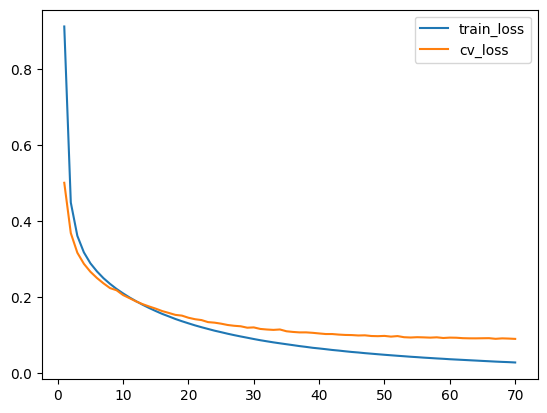

In [ ]:
plt.plot(range(1,71),history.history['loss'],label="train_loss")
plt.plot(range(1,71),history.history['val_loss'],label="cv_loss")
plt.legend()
plt.show()

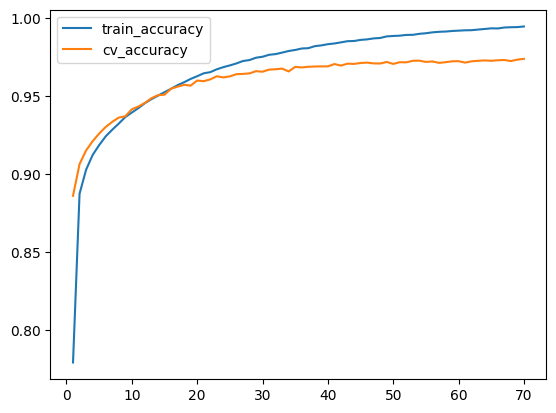

In [ ]:
plt.plot(range(1,71),history.history['accuracy'],label="train_accuracy")
plt.plot(range(1,71),history.history['val_accuracy'],label="cv_accuracy")
plt.legend()
plt.show()

In [ ]:
# handwritten digit recognition web application
# hugging face --- UI-Streamlit

In [ ]:
model.save("digit_recog.keras")

In [ ]:
from keras.models import load_model

In [ ]:
load_model("digit_recog.keras")

<Sequential name=sequential_2, built=True>